<a href="https://colab.research.google.com/github/bekircan4721/Bekircan_arac-/blob/main/explaining_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-59ec09bd4d81>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_temperature = pd.read_table("https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/pentad/pent_h22-w0-2000m.dat", delim_whitespace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 6300 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6299 non-null   object 
 1   Date                    6300 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6296 non-null   object 
 4   Country                 6250 non-null   object 
 5   Area                    5845 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5756 non-null   object 
 8   Name                    6090 non-null   object 
 9   Sex                     5735 non-null   object 
 10  Age                     3470 non-null   object 
 11  Injury                  6272 non-null   object 
 12  Fatal (Y/N)             5762 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3463 non-null   objec

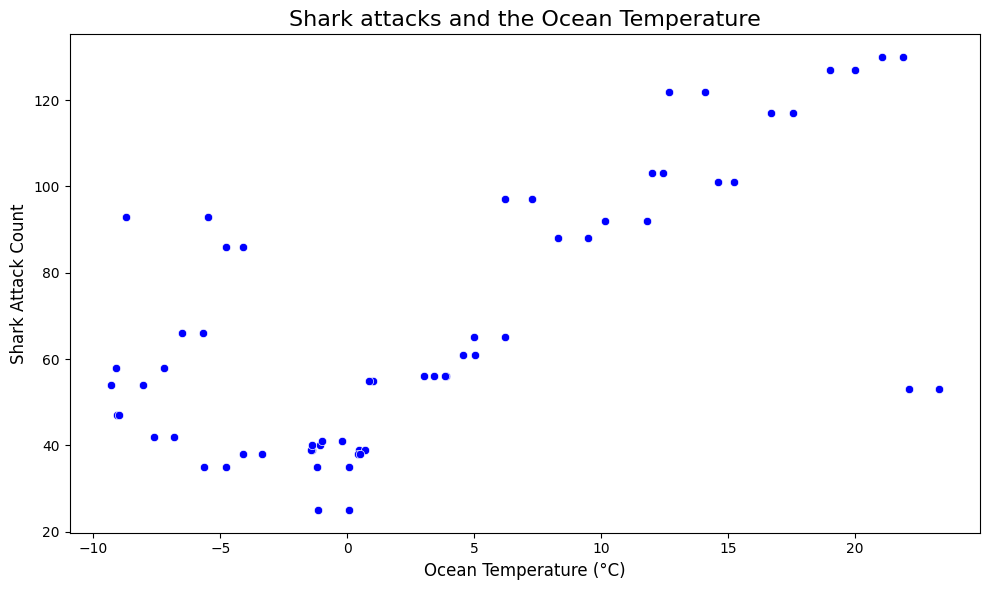

<ipython-input-1-59ec09bd4d81>:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = merged.groupby('Temperature_Binned')['Attack_Count'].sum().reset_index()


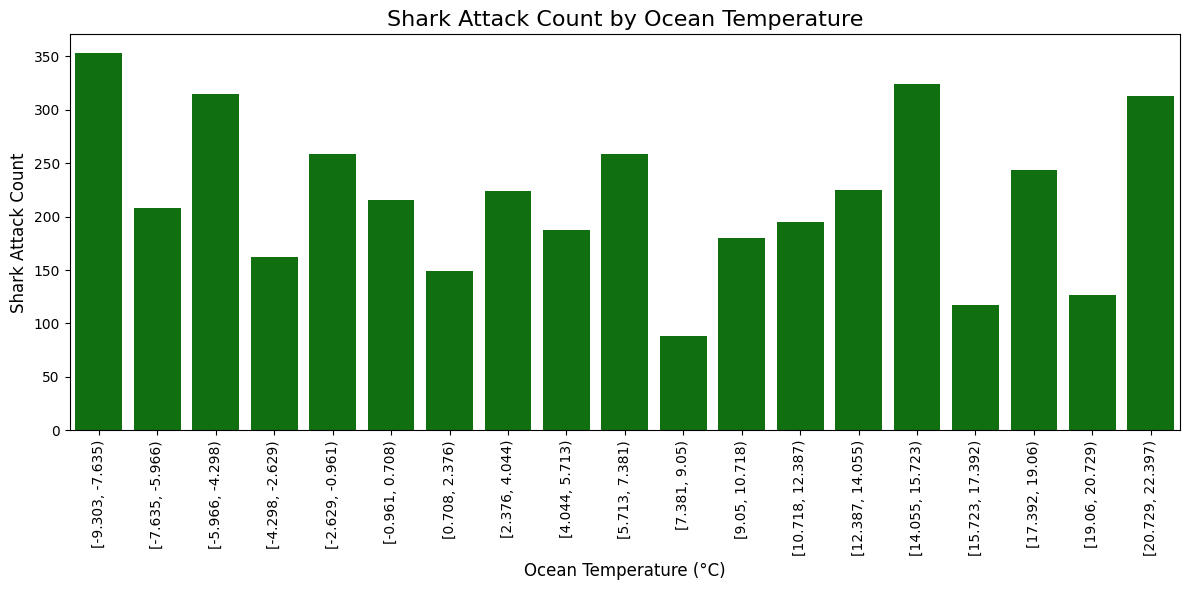

<ipython-input-1-59ec09bd4d81>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Temperature_Binned', y='Attack_Count', data=merged, palette='Set2')


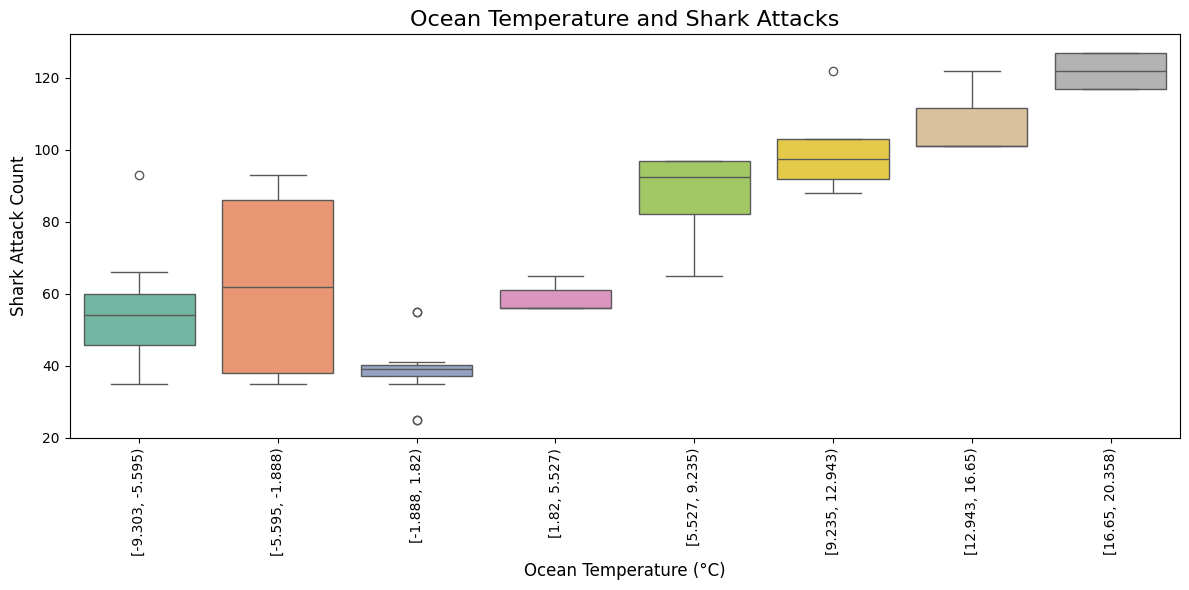

Pearson Correlation (r): 0.674
t-value: 7.062
degrees of freedom (df): 60
p-value: 0.0000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, ttest_ind, spearmanr, t
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# reading datasets
data_shark = pd.read_csv("https://raw.githubusercontent.com/bekircan4721/Bekircan_arac-/main/attacks.csv", encoding="unicode_escape")  # veya "ISO-8859-1"
data_temperature = pd.read_table("https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/pentad/pent_h22-w0-2000m.dat", delim_whitespace=True)

# filtering by year
data_shark = data_shark[data_shark["Year"].notnull()]
print(data_shark.info())

# yearly ocean temperatures
temperature_by_year = data_temperature[["YEAR", "WO"]].copy()
temperature_by_year.columns = ["Year", "Ocean_Temperature"]
temperature_by_year["Year"] = temperature_by_year["Year"].round().astype(int)

# Get shark attacks by year
shark_by_year = data_shark.groupby("Year").size().reset_index(name="Attack_Count")

# Merge datasets based on Year
merged = pd.merge(shark_by_year, temperature_by_year, on="Year", how="left")

# Drop rows with missing ocean temperature data // evet artıyor genelde
merged = merged.dropna(subset=["Ocean_Temperature"])

print(merged.isna().sum())

# correlation
correlation = merged["Ocean_Temperature"].corr(merged["Attack_Count"])
print(f"correlation between Ocean temperature and shark attacks: {correlation:.3f}")

# Scatter plot for Ocean Temperature vs Shark Attack Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ocean_Temperature', y='Attack_Count', data=merged, color='blue')

plt.title('Shark attacks and the Ocean Temperature', fontsize=16)
plt.xlabel('Ocean Temperature (°C)', fontsize=12)
plt.ylabel('Shark Attack Count', fontsize=12)

plt.tight_layout()
plt.show()

# Bin ocean temperature for grouping (for better readability on x-axis) with 0.5°C intervals
standart_variaton = merged["Ocean_Temperature"].std()
merged['Temperature_Binned'] = pd.cut(merged['Ocean_Temperature'], bins=np.arange(merged['Ocean_Temperature'].min(), merged['Ocean_Temperature'].max() +0.1,standart_variaton*0.18), right=False)

# Group by binned temperature and sum attack counts
binned_data = merged.groupby('Temperature_Binned')['Attack_Count'].sum().reset_index()

# Bar plot for Shark Attack Count vs Ocean Temperature
plt.figure(figsize=(12, 6))
sns.barplot(x='Temperature_Binned', y='Attack_Count', data=binned_data, color='green')

plt.title('Shark Attack Count by Ocean Temperature', fontsize=16)
plt.xlabel('Ocean Temperature (°C)', fontsize=12)
plt.ylabel('Shark Attack Count', fontsize=12)

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Boxplot for Ocean Temperature vs Shark Attack Count
plt.figure(figsize=(12, 6))

# Bin ocean temperature group
merged['Temperature_Binned'] = pd.cut(merged['Ocean_Temperature'], bins=np.arange(merged['Ocean_Temperature'].min(), merged['Ocean_Temperature'].max() + 0.1, standart_variaton*0.4), right=False)

# Boxplot to show the distribution of attack counts for each temperature bin
sns.boxplot(x='Temperature_Binned', y='Attack_Count', data=merged, palette='Set2')


plt.title('Ocean Temperature and Shark Attacks', fontsize=16)
plt.xlabel('Ocean Temperature (°C)', fontsize=12)
plt.ylabel('Shark Attack Count', fontsize=12)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Pearson korelasyonunu al
r, _ = pearsonr(merged['Ocean_Temperature'], merged['Attack_Count'])

# Gözlem sayısı
n = len(merged)
df = n - 2

# t-value
t_stat = r * np.sqrt(df) / np.sqrt(1 - r**2)

# p value but this is two-way
p_value = 2 * t.sf(np.abs(t_stat), df)

print(f"Pearson Correlation (r): {r:.3f}")
print(f"t-value: {t_stat:.3f}")
print(f"degrees of freedom (df): {df}")
print(f"p-value: {p_value:.4f}")
